* mencari batas suatu objek
* bentuknya list of points
* menemukan/mencari contour `cv2.findContours()`
* memanipulasi contour `cv2.drawContours()`


algoritma mendeteksi/mencari contour
* cv.RETR_EXTERNAL : mencari external contour
* cv.RETR_LIST : mencari semua contour tanpa membuat hubungan hirarki antar contournya
* cv.RETR_TREE : mencari semua contour serta membuat hubungan hirarki antar contournya
* cv.RETR_CCOMP : mencari semua contour serta membuat hubungan hirarki 2 level antar contournya, 2 level maksudnya hubungan external dan internal contour
* cv.CHAIN_APPROX_NONE : mencari semua titik contour
* cv.CHAIN_APPROX_SIMPLE : contour yang dikompres baik horizontal, vertikal, segmen diagonal
* cv.CHAIN_APPROX_TC89_L1 and cv.CHAIN_APPROX_TC89_KCOS

langkah contour : gambar yang ingin dideteksi contournya lebih baik berformat grayscale (convert), terapkan binary image (threshold), cari contour dengan findContours(), gambar contour yang ditemukan dengan drawContours()

untuk menggambar contour ada banyak algoritma (method), contohnya CHAIN_APPROX_NONE dan CHAIN_APPROX_SIMPLE

untuk menemukan contour syntax nya

    contours, hierarchy = cv2.findContours(image, mode, method)


In [1]:
!wget https://amroamroamro.github.io/mexopencv/opencv/contours_hierarchy_demo_03.png

--2024-12-26 00:26:48--  https://amroamroamro.github.io/mexopencv/opencv/contours_hierarchy_demo_03.png
Resolving amroamroamro.github.io (amroamroamro.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to amroamroamro.github.io (amroamroamro.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1503 (1.5K) [image/png]
Saving to: ‘contours_hierarchy_demo_03.png’

contours_hierarchy_ 100%[===================>]   1.47K  --.-KB/s    in 0s      

2024-12-26 00:26:48 (21.6 MB/s) - ‘contours_hierarchy_demo_03.png’ saved [1503/1503]



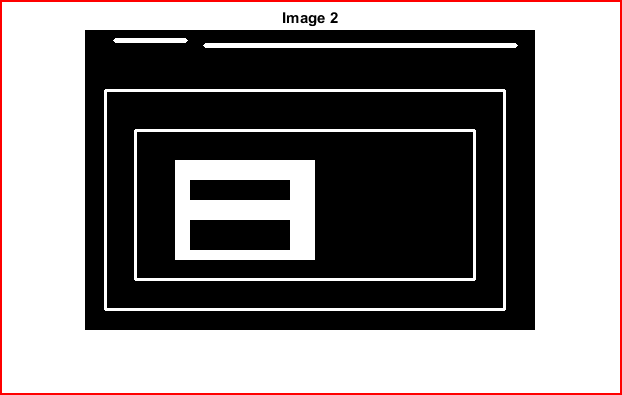

In [3]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
# Load image in color mode
img = cv2.imread('contours_hierarchy_demo_03.png', cv2.IMREAD_COLOR)

# Split the image into its separate color channels
b, g, r = cv2.split(img)

# Find contours using CHAIN_APPROX_NONE with the red channel
contours, hierarchy = cv2.findContours(r, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Draw the contours on the original image using the red color
cv2.drawContours(img, contours, -1, (0, 0, 255), 2)

# Display the final result
cv2_imshow(img)

hirarki pada contour

* jika ada contour yang jaraknya dekat maka yang menjadi child adalah inner contour. outer contour menjadi parent. hubungan ini disebut parent-child
* parent-child berupa array 4 elemen dimana informasi didalamnya adalah next contour (index untuk contour selanjutnya pada hirarki yang sama), previous contour (index untuk contour sebelumnya pada hirarki yang sama), first child contour (index untuk parent contour pertama), dan parent contour (index untuk parent contour)
* jika nilainya -1 artinya tidak ada parent atau tidak ada child

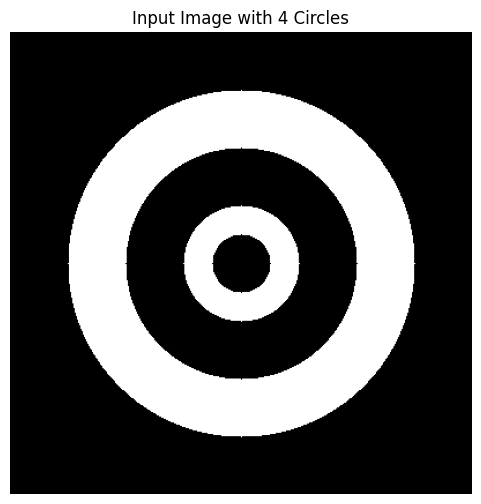

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
# Create a synthetic image with nested shapes (concentric circles)
image = np.zeros((400, 400), dtype=np.uint8)
cv2.circle(image, (200, 200), 150, 255, -1)  # Largest outer circle (filled)
cv2.circle(image, (200, 200), 100, 0, -1)    # Middle circle (hole)
cv2.circle(image, (200, 200), 50, 255, -1)   # Smallest inner circle (filled)
cv2.circle(image, (200, 200), 25, 0, -1)     # New innermost black circle

# Display the input image using matplotlib
plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')
plt.title('Input Image with 4 Circles')
plt.axis('off')
plt.show()

<img src="https://lh7-rt.googleusercontent.com/docsz/AD_4nXepcQ5eT9Br4lZpOo9L-m1fQUmakRlo7fHcd2ELWSWoKz1LdHip1oMk9vFRpvNYbm5amljEItOQbLtE4RtzpW2UuFN3SAWa9TRc32xNhTX7MVKhWx2RKic4RUTDI-xCLoAB8RHylHUEdLpYSB01__dA4t5GuVKRulf2UeyAagY8PVwcJ0c-ZBM?key=YQrGz8wtQQwf75wAsfzXkd4p">

terdapat 4 lingkaran dimana lingkaran paling luar (parent) adalah circle 1, circle 1 punya child yaitu circle 2

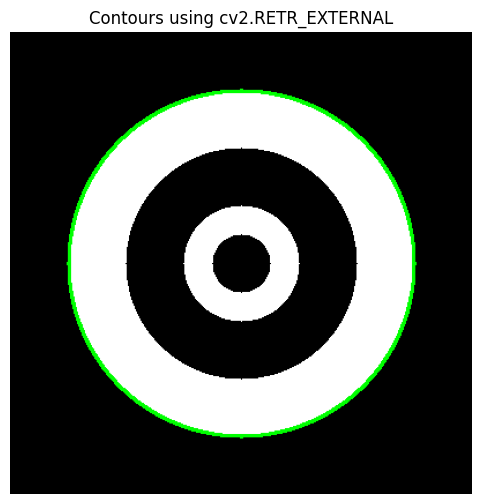

Hierarchy:
 [[[-1 -1 -1 -1]]]


In [6]:
# Find contours using cv2.RETR_EXTERNAL
contours, hierarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Convert image to color for visualization
image_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Draw the outer contours in green
cv2.drawContours(image_color, contours, -1, (0, 255, 0), 2)

# Display the result using matplotlib
plt.figure(figsize=(6, 6))
plt.imshow(image_color)
plt.title('Contours using cv2.RETR_EXTERNAL')
plt.axis('off')
plt.show()

print("Hierarchy:\n", hierarchy)

-1 artinya contour tidak punya hubungan hirarki dengan contour lainnya

<img src="https://lh7-rt.googleusercontent.com/docsz/AD_4nXf99-TkUmd-lJ1-UQznQw1X4U6OCImggNwOBpJFkN5dy6NufNIzThn3-nzfUVVhT06CgMpGZOQ417cDfjLbwtZkXz5tTB9FwlAAe0-6hPp-dgUMDwgPxW_thQ3r1HbuYxMyTNgK0ceCWef_BLZDp-bGDDNvNcefLJCWvJFDKg286nw49a7mxA?key=YQrGz8wtQQwf75wAsfzXkd4p">

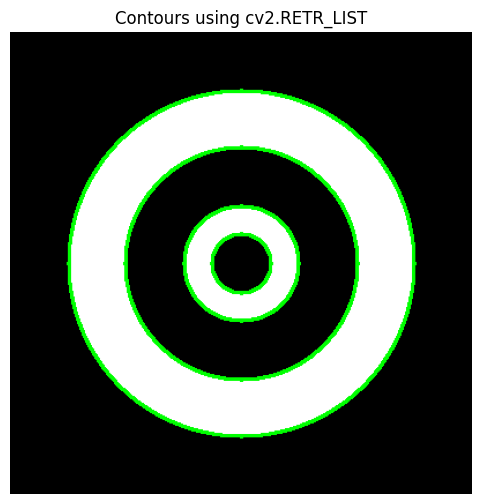

Hierarchy:
 [[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [-1  2 -1 -1]]]


In [7]:
# Find contours using cv2.RETR_LIST
contours, hierarchy = cv2.findContours(image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

# Convert image to color for visualization
image_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Draw all contours in green
cv2.drawContours(image_color, contours, -1, (0, 255, 0), 2)

# Display the result using matplotlib
plt.figure(figsize=(6, 6))
plt.imshow(image_color)
plt.title('Contours using cv2.RETR_LIST')
plt.axis('off')
plt.show()

print("Hierarchy:\n", hierarchy)

semua contour berada dalam level hirarki yang sama yaitu level 0, dimana tidak memiliki parent dan child. buktinya pada elemen ketiga dan keempat yaitu first child dan parent nilainya sama yaitu -1

<img src="https://lh7-rt.googleusercontent.com/docsz/AD_4nXczCjiPdPTFjvvwn8EEExzcY5wNl7kPj8wpIOBr-hitl84-zwaCE6OtR3_6_y1GdXCrY9tAyBPxo52wZNZujzfhWMQh8lSqY9nPIPA3BsXJqMWqyEHN2Ix-YG0MaHayZbEKNQu9AvjXm9HXJzsF4HqMQsnNgLQ0rWw_8k64NfBklgbYXcSk1tE?key=YQrGz8wtQQwf75wAsfzXkd4p">

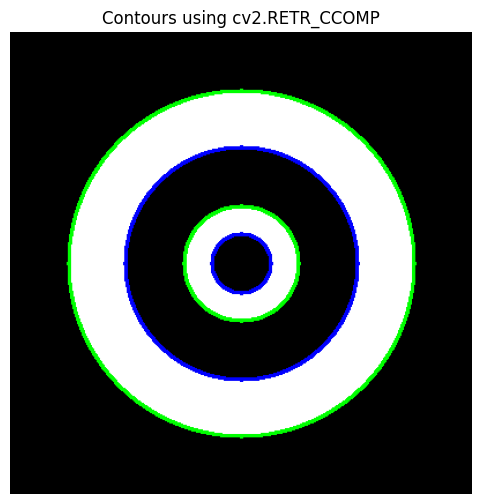

Hierarchy:
 [[[ 2 -1  1 -1]
  [-1 -1 -1  0]
  [-1  0  3 -1]
  [-1 -1 -1  2]]]


In [8]:
# Find contours using cv2.RETR_CCOMP
contours, hierarchy = cv2.findContours(image, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

# Convert image to color for visualization
image_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Draw contours based on the two-level hierarchy
for i, contour in enumerate(contours):
    if hierarchy[0][i][3] == -1:  # If it is an outer contour
        cv2.drawContours(image_color, [contour], -1, (0, 255, 0), 2)  # Green for outer contours

    else:  # If it is an inner contour (hole)
        cv2.drawContours(image_color, [contour], -1, (0, 0, 255), 2)  # Blue for inner contours


# Display the result using matplotlib
plt.figure(figsize=(6, 6))
plt.imshow(image_color)
plt.title('Contours using cv2.RETR_CCOMP')
plt.axis('off')
plt.show()

print("Hierarchy:\n", hierarchy)

memiliki 2 level hirarki, buktinya ada di parent (elemen ke 4)

<img src="https://lh7-rt.googleusercontent.com/docsz/AD_4nXcvB6ZDCV6uRceca1uIZDlvugGobmYUMqjOeGvgjvSzlrAYI3R2py1w05CNUdSEtId1sIJBnxqodCaGs9J9dajvJ854R4JRUef64PvOYCRGit9xoukVwvx1DP9ZbQl2inBNDA6_EhEGyhVNm9l8DwW7msvkVIsaKQw-bzYD1iha9h1HVwiJc5U?key=YQrGz8wtQQwf75wAsfzXkd4p">

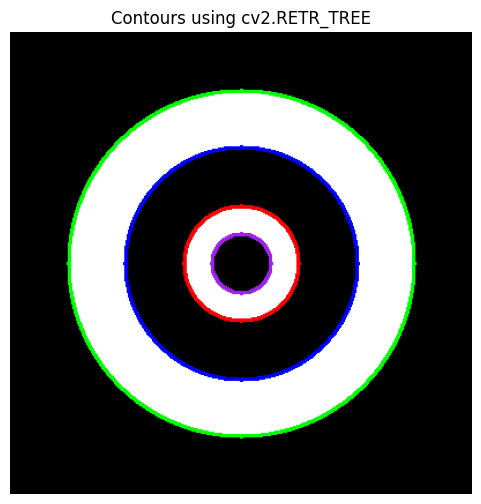

Hierarchy:
 [[[-1 -1  1 -1]
  [-1 -1  2  0]
  [-1 -1  3  1]
  [-1 -1 -1  2]]]


In [9]:
# Find contours using cv2.RETR_TREE
contours, hierarchy = cv2.findContours(image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Convert image to color for visualization
image_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Draw contours based on hierarchy levels
for i, contour in enumerate(contours):
    level = 0
    # Traverse the hierarchy to determine the level of the contour
    parent = hierarchy[0][i][3]
    while parent != -1:
        level += 1
        parent = hierarchy[0][parent][3]

    # Use different colors for the first and second levels
    if level == 0:
        cv2.drawContours(image_color, [contour], -1, (0, 255, 0), 2)  # Green for first level (outermost)
    elif level == 1:
        cv2.drawContours(image_color, [contour], -1, (0, 0, 255), 2)  # Red for second level (inner)
    elif level == 2:
        cv2.drawContours(image_color, [contour], -1, (255, 0, 0), 2)  # Blue for third level
    else:
        cv2.drawContours(image_color, [contour], -1, (160, 32, 240), 2)  # Blue for third level

# Display the result using matplotlib
plt.figure(figsize=(6, 6))
plt.imshow(image_color)
plt.title('Contours using cv2.RETR_TREE')
plt.axis('off')
plt.show()

print("Hierarchy:\n", hierarchy)

<img src="https://lh7-rt.googleusercontent.com/docsz/AD_4nXc2wOf3NKAR8WVdBu66zXSVFoMHZx1IK8tKjnnW4MmEm2ENAmX0yjdymSroF65I-HOkcq16b5XGhxvmIJsntBoF7IdmongXfaEQQckCDZc9-zUyyEvrFk8LCsmVmZEML31Cr-8UR7cCXpvO8VNNgNfBif4DMBUq-IAJYYGOd994SxDjGpN-Pfc?key=YQrGz8wtQQwf75wAsfzXkd4p">

contoh kasus

In [10]:
!wget https://raw.githubusercontent.com/tim3in/image-processing/refs/heads/main/images/image_contouring/shapes.jpg

--2024-12-26 00:57:07--  https://raw.githubusercontent.com/tim3in/image-processing/refs/heads/main/images/image_contouring/shapes.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42145 (41K) [image/jpeg]
Saving to: ‘shapes.jpg’

shapes.jpg          100%[===================>]  41.16K  --.-KB/s    in 0s      

2024-12-26 00:57:07 (93.3 MB/s) - ‘shapes.jpg’ saved [42145/42145]



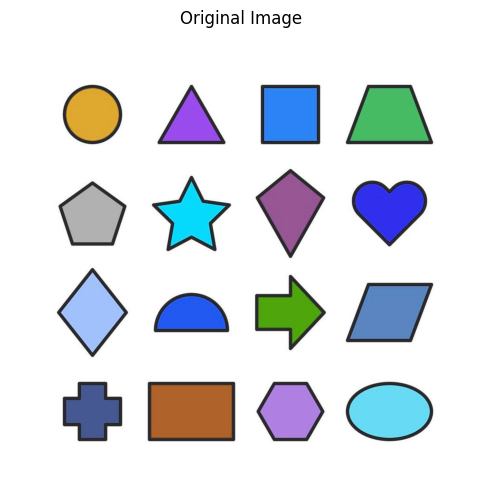

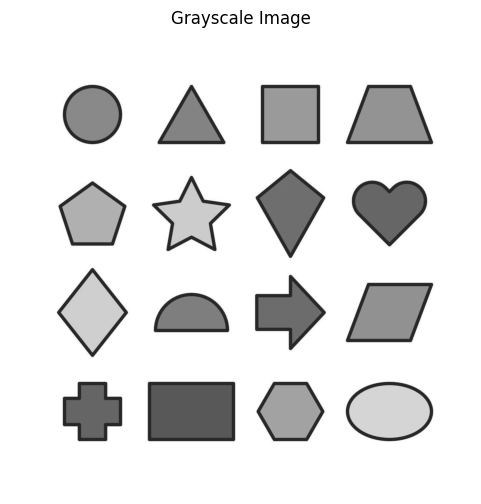

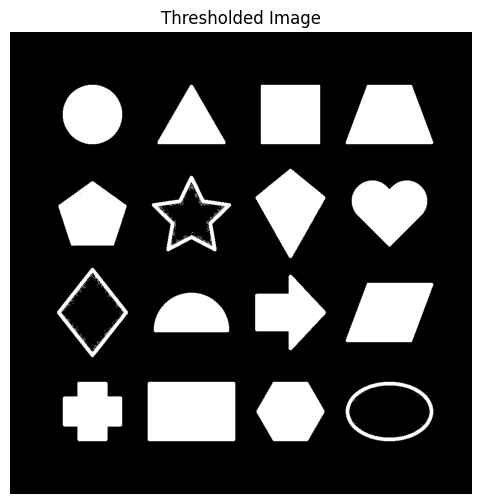

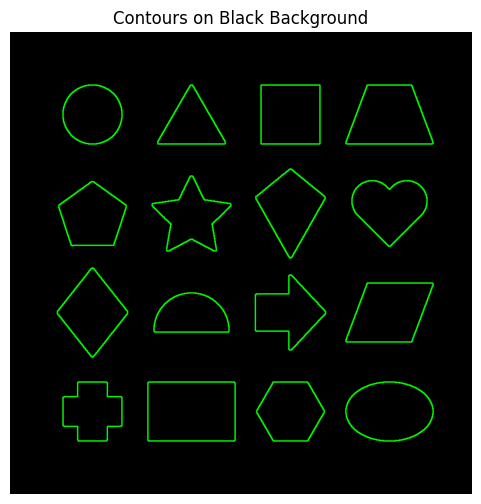

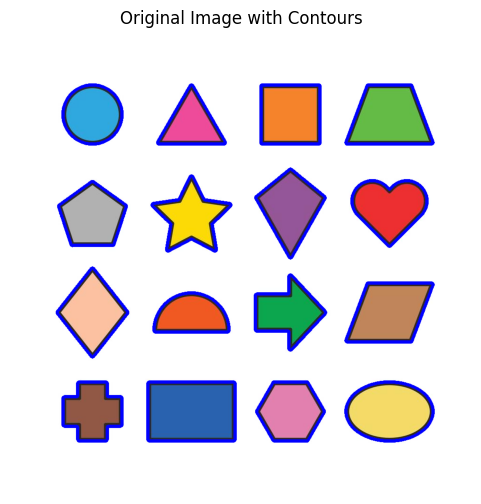

In [12]:
# Read the image
image = cv2.imread('shapes.jpg')
# Display the original image
plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Display the grayscale image
plt.figure(figsize=(6, 6))
plt.imshow(gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

# Apply thresholding to create a binary image
_, binary = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)
# Display the thresholded image
plt.figure(figsize=(6, 6))
plt.imshow(binary, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')
plt.show()

# Find contours in the binary image
contours, hierarchy = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create copies of the original image to draw contours
contour_image = image.copy()
contour_on_original = image.copy()

# Draw the contours on the binary (black) image
contour_black = np.zeros_like(image)
cv2.drawContours(contour_black, contours, -1, (0, 255, 0), 2)

# Draw the contours on the original image
cv2.drawContours(contour_on_original, contours, -1, (255,0, 0), 5)

# Convert images from BGR to RGB for visualization with matplotlib
contour_black_rgb = cv2.cvtColor(contour_black, cv2.COLOR_BGR2RGB)
# Display the contour on a black background
plt.figure(figsize=(6, 6))
plt.imshow(contour_black_rgb)
plt.title('Contours on Black Background')
plt.axis('off')
plt.show()

contour_on_original_rgb = cv2.cvtColor(contour_on_original, cv2.COLOR_BGR2RGB)
original_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Display the original image with contours
plt.figure(figsize=(6, 6))
plt.imshow(contour_on_original_rgb)
plt.title('Original Image with Contours')
plt.axis('off')
plt.show()

cv.moments

In [13]:
!wget https://www.tutorialspoint.com/assets/questions/media/394091-1664341923.png

--2024-12-26 02:03:13--  https://www.tutorialspoint.com/assets/questions/media/394091-1664341923.png
Resolving www.tutorialspoint.com (www.tutorialspoint.com)... 3.167.69.85, 3.167.69.34, 3.167.69.28, ...
Connecting to www.tutorialspoint.com (www.tutorialspoint.com)|3.167.69.85|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1240123 (1.2M) [image/png]
Saving to: ‘394091-1664341923.png’

394091-1664341923.p 100%[===================>]   1.18M  1.94MB/s    in 0.6s    

2024-12-26 02:03:14 (1.94 MB/s) - ‘394091-1664341923.png’ saved [1240123/1240123]



Number of Contours detected: 3
Moments of first contour: {'m00': 14947.0, 'm10': 5239300.5, 'm01': 4905869.833333333, 'm20': 1855054841.3333333, 'm11': 1719626880.3333333, 'm02': 1627236449.0, 'm30': 663246399000.25, 'm21': 608855981883.0333, 'm12': 570384732497.0, 'm03': 545278150361.85004, 'mu20': 18547868.074468374, 'mu11': -4234.319657325745, 'mu02': 17043178.00180459, 'mu30': -103085.66333007812, 'mu21': -2867085.318628311, 'mu12': 93785.43371105194, 'mu03': 2614635.8901367188, 'nu20': 0.08302061174329703, 'nu11': -1.8952895656603758e-05, 'nu02': 0.07628559024028292, 'nu30': -3.7740980910254148e-06, 'nu21': -0.00010496766357504605, 'nu12': 3.4336047797598577e-06, 'nu03': 9.572516684589537e-05}


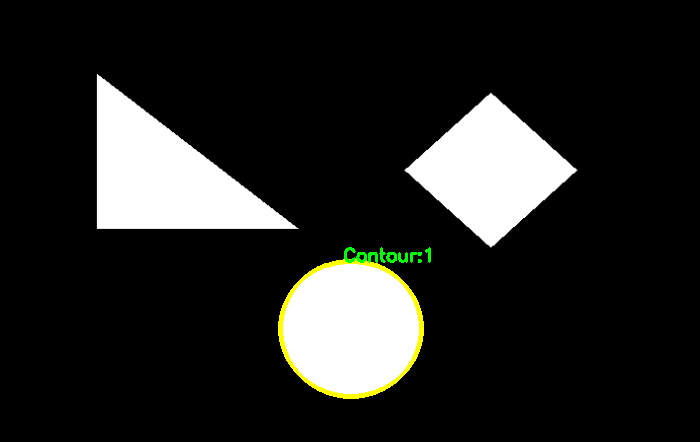

In [15]:
import cv2

# Read the input image
img = cv2.imread('/content/394091-1664341923.png')

# Convert the input image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# apply thresholding on gray image
ret,thresh = cv2.threshold(gray,150,255,0)

# Find the contours in the image
contours,hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# contours berisi jumlah objek yang terdeteksi
print("Number of Contours detected:",len(contours))

# Find the moments of first contour
cnt = contours[0] # kita pilih contour pertama
M = cv2.moments(cnt)

# Draw the contour
cv2.drawContours(img, [cnt], -1, (0,255,255), 3)
x1, y1 = cnt[0,0]
cv2.putText(img, 'Contour:1', (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

# print the moments of the first contour
print("Moments of first contour:", M)
cv2_imshow(img)

Number of Contours detected: 3
Moments of Contour 1:
 {'m00': 14897.0, 'm10': 5221775.5, 'm01': 4887677.0, 'm20': 1848895928.0, 'm11': 1713250292.25, 'm02': 1620468672.1666665, 'm30': 661076202892.75, 'm21': 606615866389.25, 'm12': 568012626716.9166, 'm03': 542717625149.5, 'mu20': 18531467.209219933, 'mu11': -4189.223685979843, 'mu02': 16831264.88137412, 'mu30': -106551.06286621094, 'mu21': -388716.3445520401, 'mu12': 96697.92519950867, 'mu03': 364583.42919921875, 'nu20': 0.08350494031502921, 'nu11': -1.8877127747877817e-05, 'nu02': 0.07584363145549101, 'nu30': -3.933786103639381e-06, 'nu21': -1.4351118734276123e-05, 'nu12': 3.5700155790864003e-06, 'nu03': 1.346014942339805e-05}
Moments of Contour 2:
 {'m00': 13172.5, 'm10': 6459491.666666666, 'm01': 2235588.833333333, 'm20': 3183650603.9166665, 'm11': 1096322940.2916665, 'm02': 392406353.4166666, 'm30': 1576943072349.8, 'm21': 540357013185.89996, 'm12': 192441180233.93332, 'm03': 71008945202.45, 'mu20': 16064147.910889149, 'mu11': 414

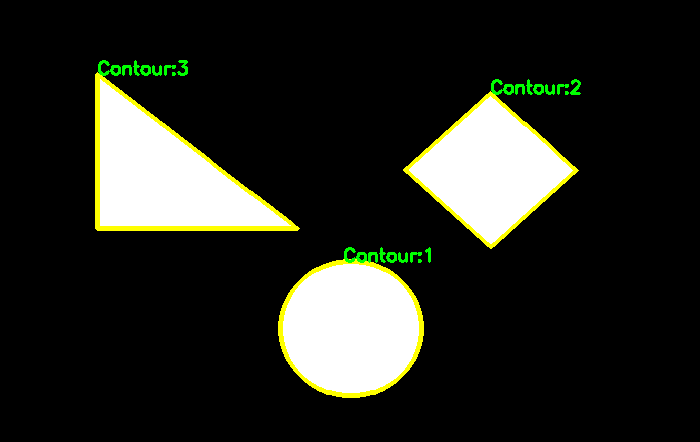

In [16]:
import cv2
img = cv2.imread('/content/394091-1664341923.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,170,255,0)
contours,hierarchy = cv2.findContours(thresh, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
print("Number of Contours detected:",len(contours))
# gambar semua objek yang terdeteksi oleh contour
for i, cnt in enumerate(contours):
   M = cv2.moments(cnt)
   print(f"Moments of Contour {i+1}:\n", M)
   x1, y1 = cnt[0,0]
   img1 = cv2.drawContours(img, [cnt], -1, (0,255,255), 3)
   cv2.putText(img1, f'Contour:{i+1}', (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
cv2_imshow(img)

mencari titik tengah/centroid dari objek yang terdeteksi oleh  contour

<img src="https://cdn-ilcabpl.nitrocdn.com/XTpGTaZWYQSxctfMHQPVOQKOsBspWTQi/assets/images/optimized/rev-6a836b4/learnopencv.com/wp-content/ql-cache/quicklatex.com-1aa636507f6ba5fbf430e08b13ecf07e_l3.png">

<img src="https://cdn-ilcabpl.nitrocdn.com/XTpGTaZWYQSxctfMHQPVOQKOsBspWTQi/assets/images/optimized/rev-6a836b4/learnopencv.com/wp-content/ql-cache/quicklatex.com-d993fc1b3e18f913051c0a476dc132fd_l3.png">

In [19]:
# pilih 1 contour
M = cv2.moments(cnt)

# cari centroid nya
x_coordinate = int(M['m10'] / M['m00'])
y_coordinate = int(M['m01'] / M['m00'])

#the centroid
x_coordinate,y_coordinate

(163, 176)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
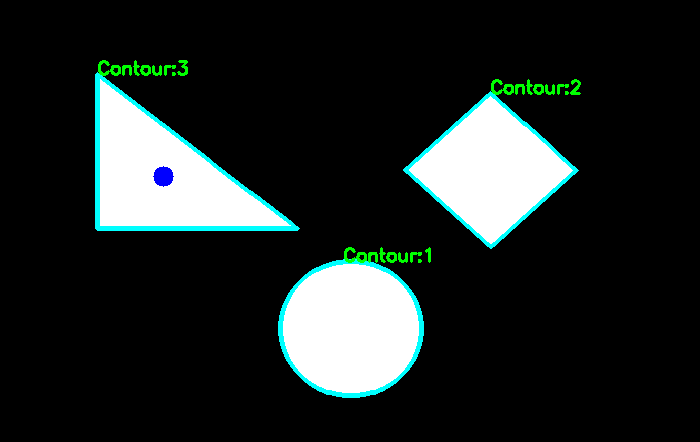

In [20]:
cv2.circle(img,(x_coordinate,y_coordinate), 10, (0,0,255), -1)

untuk menghitung luas area suatu objek menggunakan contour maka gunakan `contourArea`

In [21]:
contour = contours[1]
contour_area= cv2.contourArea(contour)
contour_area

13172.5

untuk menemukan panjang busur (arc length) gunakan `cv2.arcLength()`

In [22]:
contour_perimeter = cv2.arcLength(contour,True)
contour_perimeter

469.33514511585236

kita bisa mendeteksi suatu objek apakah berbentuk lingkaran, persegi, dll kita bisa menggunakan algoritma Ramer-Douglas-Peucker (RDP)

<img src="https://www.scaler.com/topics/images/contour-analysis-opencv-11.gif">

```
epsilon = 0.1*cv.arcLength(cnt,True)
approx = cv.approxPolyDP(cnt,epsilon,True)
```

epsilon adalah jarak terbesar antara contour ke approximation contour (gambarannya seperti visualisasi diatas). jadi berhati hatilah saat setting nilai epsilon

In [27]:
!wget https://i0.wp.com/theailearner.com/wp-content/uploads/2019/11/cont_new.png

--2024-12-26 02:27:01--  https://i0.wp.com/theailearner.com/wp-content/uploads/2019/11/cont_new.png
Resolving i0.wp.com (i0.wp.com)... 192.0.77.2
Connecting to i0.wp.com (i0.wp.com)|192.0.77.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4983 (4.9K) [image/png]
Saving to: ‘cont_new.png’

cont_new.png        100%[===================>]   4.87K  --.-KB/s    in 0s      

2024-12-26 02:27:01 (49.6 MB/s) - ‘cont_new.png’ saved [4983/4983]



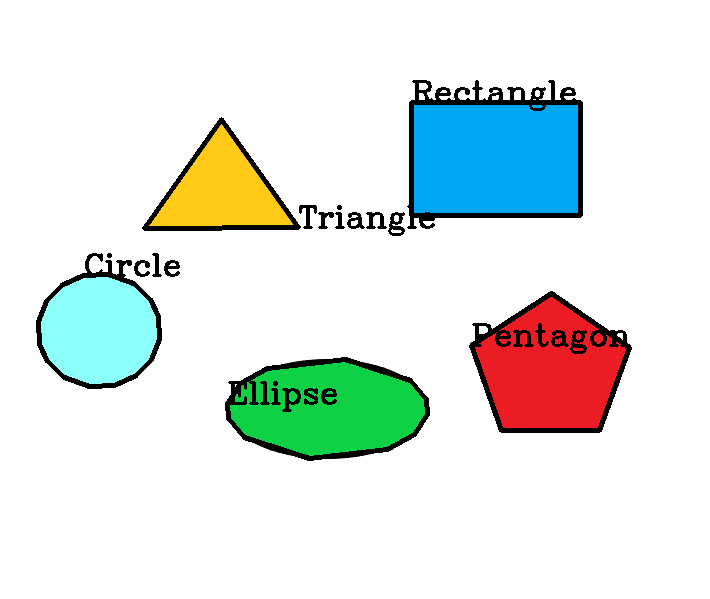

In [29]:
import cv2
import numpy as np

# Load the image
img = cv2.imread("cont_new.png")
# Convert to greyscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Convert to binary image by thresholding
_, threshold = cv2.threshold(img_gray, 245, 255, cv2.THRESH_BINARY_INV)
# Find the contours
contours, _ = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# For each contour approximate the curve and
# detect the shapes.
for cnt in contours:
  # epsilon 1%
    epsilon = 0.01*cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, epsilon, True)
    cv2.drawContours(img, [approx], 0, (0), 3)
    # Position for writing text
    x,y = approx[0][0]

    if len(approx) == 3:
        cv2.putText(img, "Triangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 1, 0,2)
    elif len(approx) == 4:
        cv2.putText(img, "Rectangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 1, 0,2)
    elif len(approx) == 5:
        cv2.putText(img, "Pentagon", (x, y), cv2.FONT_HERSHEY_COMPLEX, 1, 0,2)
    elif 6 < len(approx) < 15:
        cv2.putText(img, "Ellipse", (x, y), cv2.FONT_HERSHEY_COMPLEX, 1, 0,2)
    else:
        cv2.putText(img, "Circle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 1, 0,2)
from google.colab.patches import cv2_imshow
cv2_imshow(img)

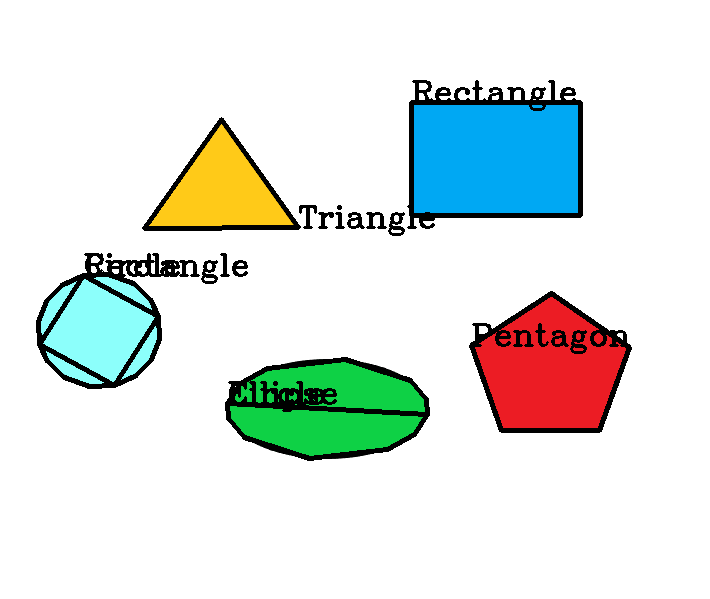

In [30]:
# For each contour approximate the curve and
# detect the shapes.
for cnt in contours:
  # epsilon 10%
    epsilon = 0.1*cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, epsilon, True)
    cv2.drawContours(img, [approx], 0, (0), 3)
    # Position for writing text
    x,y = approx[0][0]

    if len(approx) == 3:
        cv2.putText(img, "Triangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 1, 0,2)
    elif len(approx) == 4:
        cv2.putText(img, "Rectangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 1, 0,2)
    elif len(approx) == 5:
        cv2.putText(img, "Pentagon", (x, y), cv2.FONT_HERSHEY_COMPLEX, 1, 0,2)
    elif 6 < len(approx) < 15:
        cv2.putText(img, "Ellipse", (x, y), cv2.FONT_HERSHEY_COMPLEX, 1, 0,2)
    else:
        cv2.putText(img, "Circle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 1, 0,2)
from google.colab.patches import cv2_imshow
cv2_imshow(img)

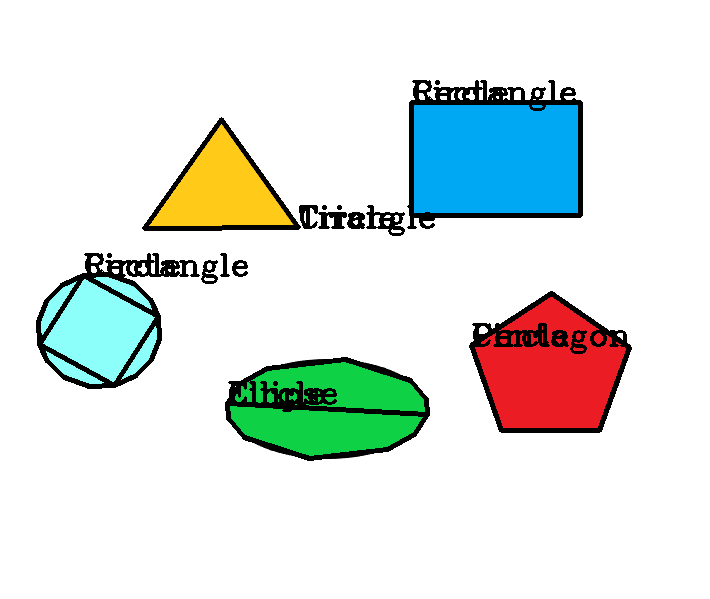

In [31]:
# For each contour approximate the curve and
# detect the shapes.
for cnt in contours:
  # epsilon 80%
    epsilon = 0.8*cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, epsilon, True)
    cv2.drawContours(img, [approx], 0, (0), 3)
    # Position for writing text
    x,y = approx[0][0]

    if len(approx) == 3:
        cv2.putText(img, "Triangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 1, 0,2)
    elif len(approx) == 4:
        cv2.putText(img, "Rectangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 1, 0,2)
    elif len(approx) == 5:
        cv2.putText(img, "Pentagon", (x, y), cv2.FONT_HERSHEY_COMPLEX, 1, 0,2)
    elif 6 < len(approx) < 15:
        cv2.putText(img, "Ellipse", (x, y), cv2.FONT_HERSHEY_COMPLEX, 1, 0,2)
    else:
        cv2.putText(img, "Circle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 1, 0,2)
from google.colab.patches import cv2_imshow
cv2_imshow(img)